# Prediction of Potential Sleep Disorder

**This project focuses on generating a prediction model that could detect if a person has or could have sleep disorder in near future. This could be helpful for the insurance companies to compute the monthly premium for their client based on their habits and potential future risk of sleep disorder.**

**Few Questions that could be answered throughout this case study would be:**

* Which factors could contribute to a sleep disorder? 
* Does an increased physical activity level result in a better quality of sleep? 
* Does the presence of a sleep disorder affect the subjective sleep quality metric?

# 1. Data Preparing

* Import the dataset
* Import necessary libraries
* Check for dataset, columns, datatypes

In [1]:
#import dataset to the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [2]:
#import the required libraries

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from pandas.api.types import CategoricalDtype

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
#load dataset

sleep_data = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Checking for values in some important fields**

In [5]:
sleep_data['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

**There are more than 200 null values in the column: "Sleep Disorder". We will replace the null values with "None".**

In [6]:
sleep_data['Sleep Disorder'] = sleep_data['Sleep Disorder'].fillna('None')
sleep_data['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [7]:
#check for unique values in each column
sleep_data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [8]:
sleep_data['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

**--> The above result shows that out of total 374 records, 219 people have no disorder, 78 have sleep apnea and 77 have insomnia.**

# 2. Visualize the data 

**1. How Gender affects the sleep disorder**

In [9]:
fig=px.histogram(sleep_data,x='Sleep Disorder', 
                 color='Gender',barmode="group",
                 color_discrete_sequence=['#C39BD3','#4A235A'],
                 text_auto=True)
fig.update_layout(title='Sleep Disorder in Men vs Women',
                 plot_bgcolor='#EABCD0')
fig.show()

**Observation:**

* The above histogram shows that Males on an average do not suffer from any sleep related disorders.
* Whereas, For sleep apnea - women suffer it more than men
* For Insomia - the range is quite similar.

**2. Occupation vs Sleep Disorder**

In [10]:
fig=px.histogram(sleep_data,x='Occupation', 
                 color='Sleep Disorder',barmode="group",
                 color_discrete_sequence=['#C39BD3','#4A235A', '#1C331B'],
                 text_auto=True)
fig.update_layout(title='Sleep Disorder based on Occupation',
                 plot_bgcolor='#EADBD0')
fig.show()

**Observation:**

* Nurse, Teacher and Sales are the three ocupantions where sleep related problems are more comapred to other ocupations.

**3. Sleep Duration and Quality of Sleep**

This is to see if Sleep Duration and Quality of Sleep are related.

[Text(0.5, 1.0, 'Hours of Sleep vs Quality of Sleep')]

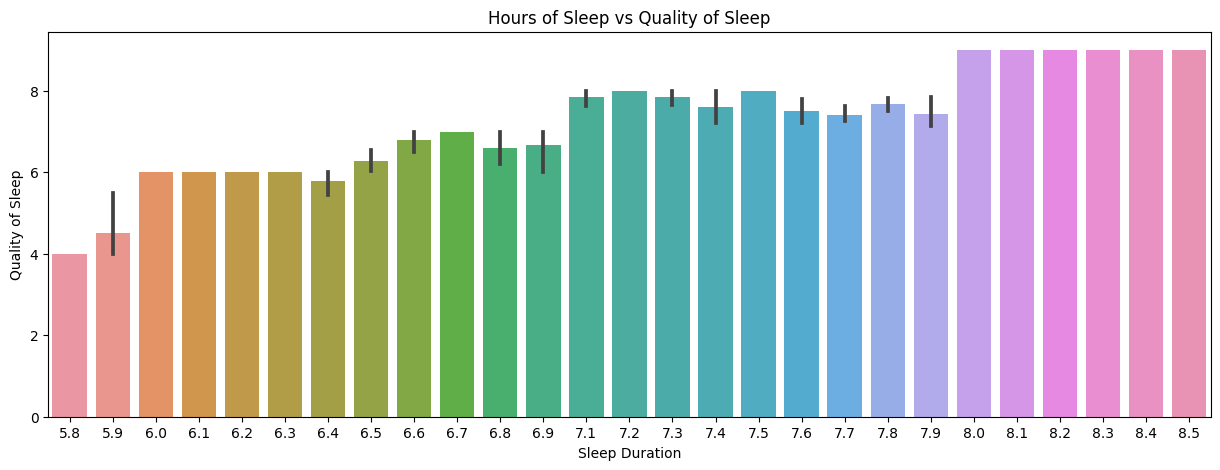

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = sleep_data, x ='Sleep Duration', 
            y = 'Quality of Sleep').set(title='Hours of Sleep vs Quality of Sleep')

**Observations:**

* As can be seen from results, longer the duration of sleep, the more quality of a sleep it is.
* This would mean if the sleep duration is more, then the chances of sleep disorder would be less.

**4. Effect of occupation on sleep**

In [12]:
# plot for occupation, sleep duration and sleep disorder
#occ_sleep = sleep_data.groupby("Occupation")['Sleep Duration'].mean()
#occ_sleep
#sleep_data.pivot_table(index='Occupation',
 #                      columns='Sleep Duration',
  #                     aggfunc={'Sleep Disorder':'count'})
occ_sleep = sleep_data.pivot_table("Sleep Duration",index='Occupation',columns='Sleep Disorder',
                      sort = True)
occ_sleep

Sleep Disorder,Insomnia,None,Sleep Apnea
Occupation,,,
Accountant,6.657143,7.220000,NaN
Doctor,6.866667,6.943750,7.47500
Engineer,7.440000,8.038596,7.80000
Lawyer,7.400000,7.419048,7.30000
Manager,NaN,6.900000,NaN
Nurse,6.333333,7.222222,7.07541
Sales Representative,NaN,NaN,5.90000
Salesperson,6.396552,6.450000,6.50000
Scientist,NaN,6.200000,5.80000


<Axes: title={'center': 'Effect of occupation on sleep leading to disorder'}, xlabel='Occupation'>

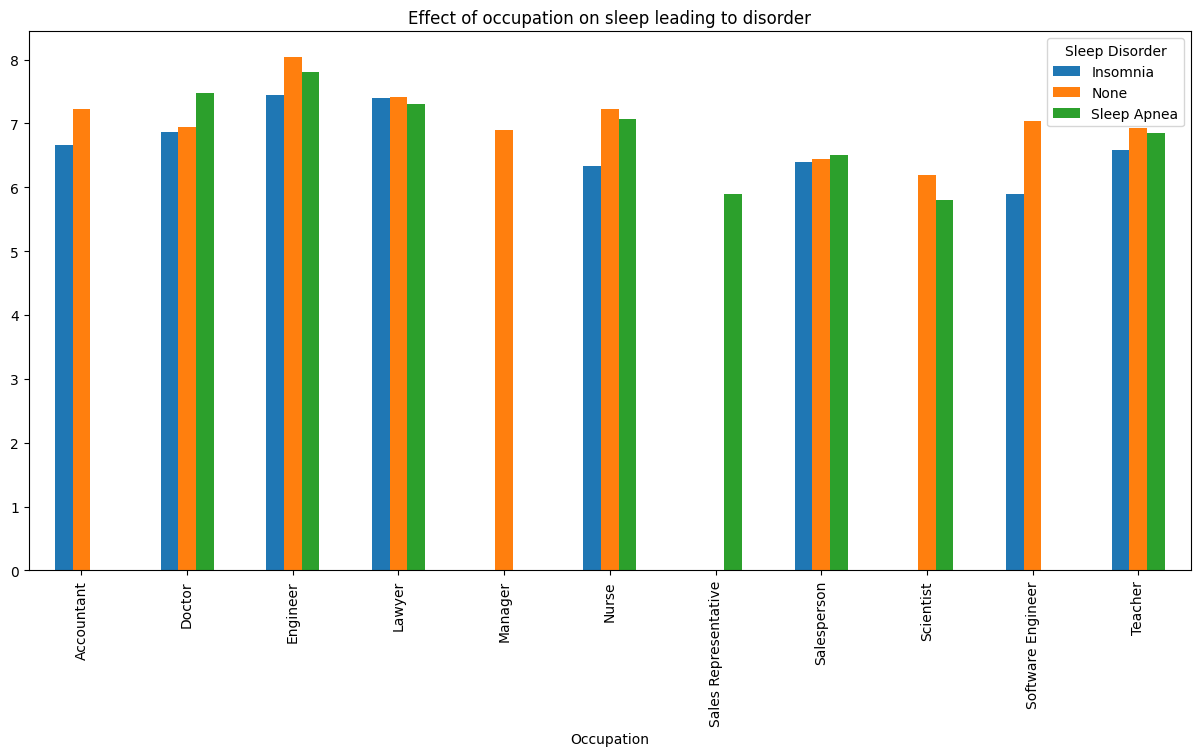

In [13]:
sleep_data.pivot_table("Sleep Duration",index='Occupation',columns='Sleep Disorder',
                      sort = True).plot(kind = 'bar', figsize = (15,7),
                                        title = "Effect of occupation on sleep leading to disorder")
#ax = occ_sleep.plot(kind = 'bar', x = )


<Axes: title={'center': 'Effect of Sleep Duration on Sleep Disorder'}>

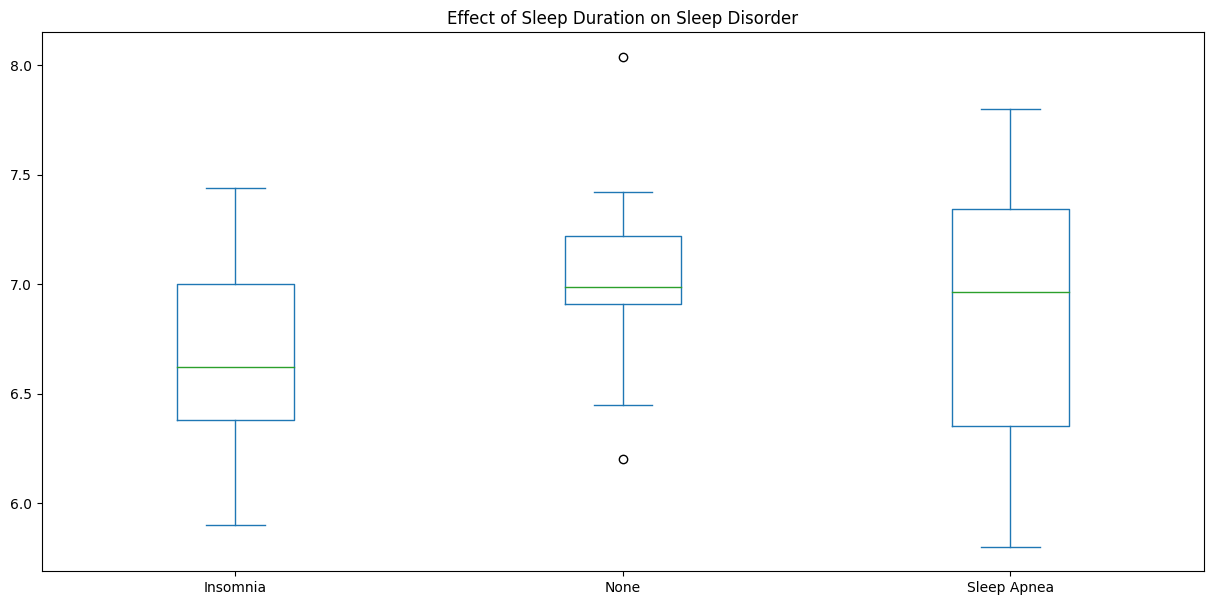

In [14]:
sleep_data.pivot_table("Sleep Duration",index='Occupation',columns='Sleep Disorder',
                      sort = True).plot(kind = 'box', figsize = (15,7),
                                        title = "Effect of Sleep Duration on Sleep Disorder")

**5. Effect of Age on sleep duration and related disorders**

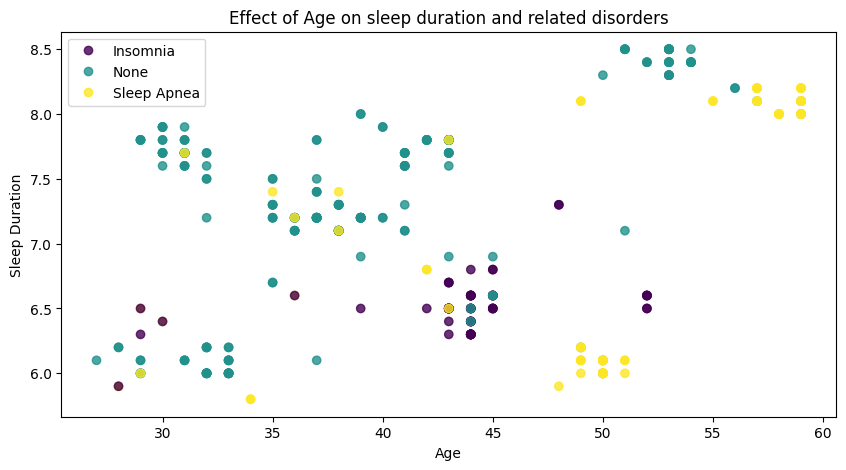

In [15]:
#link between age and sleep duration with a scatterplot including information on the sleep disorder.

fig, ax = plt.subplots(figsize=(10, 5))
labels, index = np.unique(sleep_data["Sleep Disorder"], return_inverse = True)
sc = ax.scatter(x = 'Age', y = 'Sleep Duration',data = sleep_data, marker = 'o',
           c = index, alpha = 0.8)
ax.set_xlabel("Age")
ax.set_ylabel("Sleep Duration")
plt.title("Effect of Age on sleep duration and related disorders")

ax.legend(sc.legend_elements()[0],labels)
plt.show()

**6. Quality of Sleep vs Sleep Disorder**

Like we saw above, the more the sleep duration, the better quality of sleep it is. Now we need to check if better quality results in lesser sleep related problems.

In [16]:
fig=px.histogram(sleep_data,x='Quality of Sleep', 
                 color='Sleep Disorder',barmode="group",
                 #color_discrete_sequence=['#C39BD3','#4A235A'],
                 text_auto=True)
#fig.update_layout(title='Sleep Disorder vs Quality of sleep')
                 #plot_bgcolor='#EABCD0')
fig.show()

**Observations:**

* On an average, it can be seen that the quality of sleep is good, then there is no sleep disorder.
* If the quality of sleep is less than 6 which is less than 6hrs of sleep, then there is a direct risk of sleep insomnia or apnea.

**7. How does age affects the Sleep**

<Axes: xlabel='Age', ylabel='Sleep Disorder'>

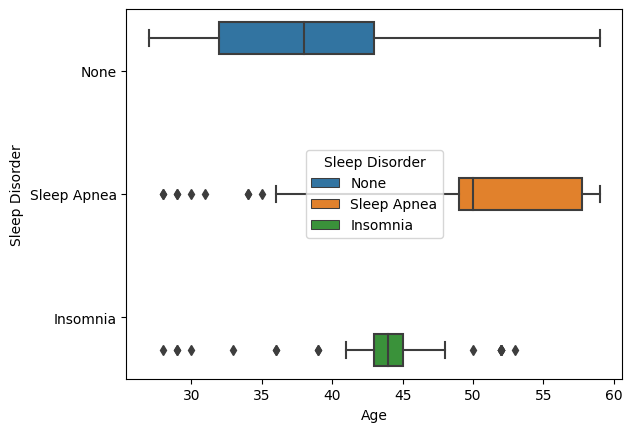

In [17]:
sns.boxplot(data=sleep_data, x="Age", y = 'Sleep Disorder', hue="Sleep Disorder")

**Observations:**

* On an average, younger generation tend to have no problems (age less than 40).
* People with age group between 43-45 are at a high risk of insomnia
* And, people above 50, suffer from Sleep Apnea

**8. Physical Activity Level vs Daily Steps**

[Text(0.5, 1.0, 'Physical Activity Level vs Daily Steps')]

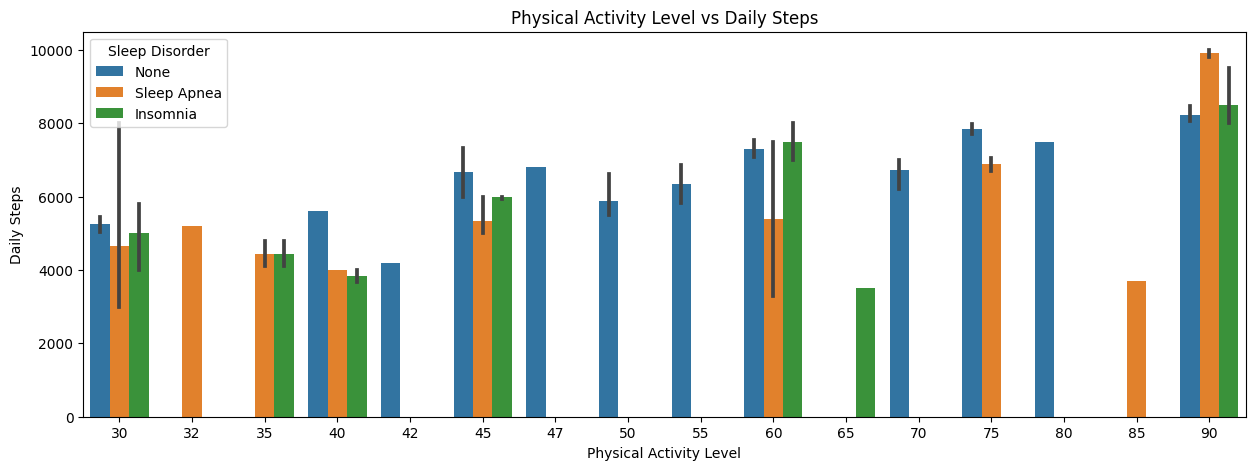

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = sleep_data, x ='Physical Activity Level', hue = 'Sleep Disorder',
            y = 'Daily Steps').set(title='Physical Activity Level vs Daily Steps')

**8. Physical Activity Level vs Sleep disorder**

In [19]:
fig = px.violin(sleep_data, x="Sleep Disorder",y='Physical Activity Level',
                 color='Sleep Disorder',
                 color_discrete_sequence=['#1C331B','#4A235A','#C39BD3'],
                 violinmode='overlay')

fig.show()


**9. Blood Pressure and Heart Rate vs Sleep Disorder**

In [20]:
fig=px.scatter(sleep_data,y='Blood Pressure',x='Heart Rate',
                  color='Sleep Disorder')

fig.show()

**Observations:**

* People with high blood pressure and hear rates more than 80, are more at risk for insomnia and sleep apnea.
* Most people who do not suffer from such risks, have stable heart rate and lower blood pressure

**10. Stress Level vs Sleep Disorder**

In [21]:
sleep_data['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5])

<Axes: xlabel='Stress Level', ylabel='count'>

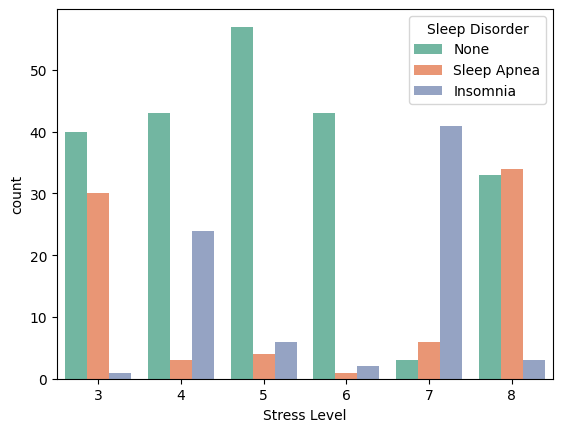

In [22]:
sns.countplot(x = 'Stress Level',hue = 'Sleep Disorder', data = sleep_data, palette = 'Set2')

**Observations:**

* Clearly, more the stress, more is the sleep disorder

**11. Distribution of BMI vs Sleep Disorder**

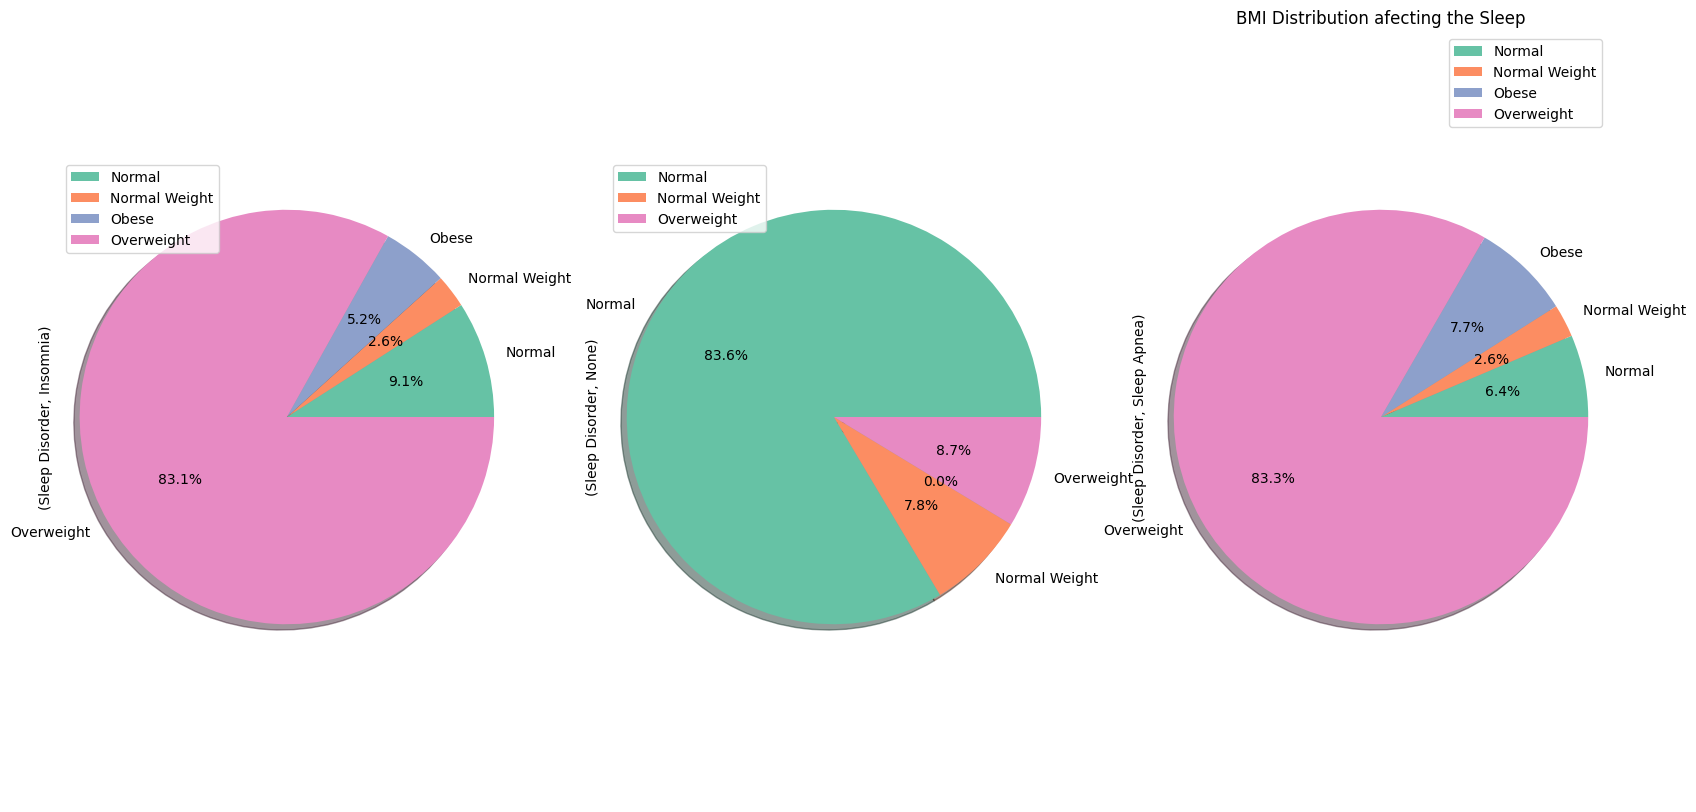

In [23]:
sleep_data.pivot_table(index='BMI Category',
                       columns='Sleep Disorder',
                       aggfunc={'Sleep Disorder':'count'}).plot.pie(subplots=True,
                                                         figsize=(20,10),autopct ='%1.1f%%',
                                             shadow=True,colors=sns.color_palette('Set2'))
# Add Title 
plt.title(
    label="BMI Distribution afecting the Sleep"
    #fontdict={"fontsize":16},
    #pad=20
)
plt.axis('equal')
plt.show()

**Observations:**

* Overweight people tend to have more health related issues.
* People who do not have any sleep disorder, majority of them have normal BMI

# 3. Data Processing

**Blood Pressure can be categorized into 3 categories:**
* Normal	systolic: less than 120 mm Hg diastolic: less than 80 mm Hg
* At Risk (prehypertension)	systolic: 120–139 mm Hg diastolic: 80–89 mm Hg
* High Blood Pressure (hypertension)	systolic: 140 mm Hg or higher diastolic: 90 mm Hg or higher

We will combine At risk and High BP into 1 category

In [24]:
sleep_data['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [25]:
sleep_data['Blood Pressure']=sleep_data['Blood Pressure'].apply(lambda x:0 if x in
['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] 
                                                                else 1)
# 0 = normal blood pressure
# 1 = abnormal blood pressure

**Convert into ordinal features**

In [26]:
sleep_data["Age"]=pd.cut(sleep_data["Age"],2)
sleep_data["Heart Rate"]=pd.cut(sleep_data["Heart Rate"],4)
sleep_data["Daily Steps"]=pd.cut(sleep_data["Daily Steps"],4)
sleep_data["Sleep Duration"]=pd.cut(sleep_data["Sleep Duration"],3)
sleep_data["Physical Activity Level"]=pd.cut(sleep_data["Physical Activity Level"],4)

In [27]:
from sklearn.preprocessing import LabelEncoder #for converting non-numeric data (String or Boolean) into numbers
LE=LabelEncoder()

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    sleep_data[label]=LE.fit_transform(sleep_data[label])

**Remove unwanted columns**

In [28]:
#remove column
sleep_data.drop(['Person ID'], axis=1, inplace=True)

**Generating a co-relation matrix**

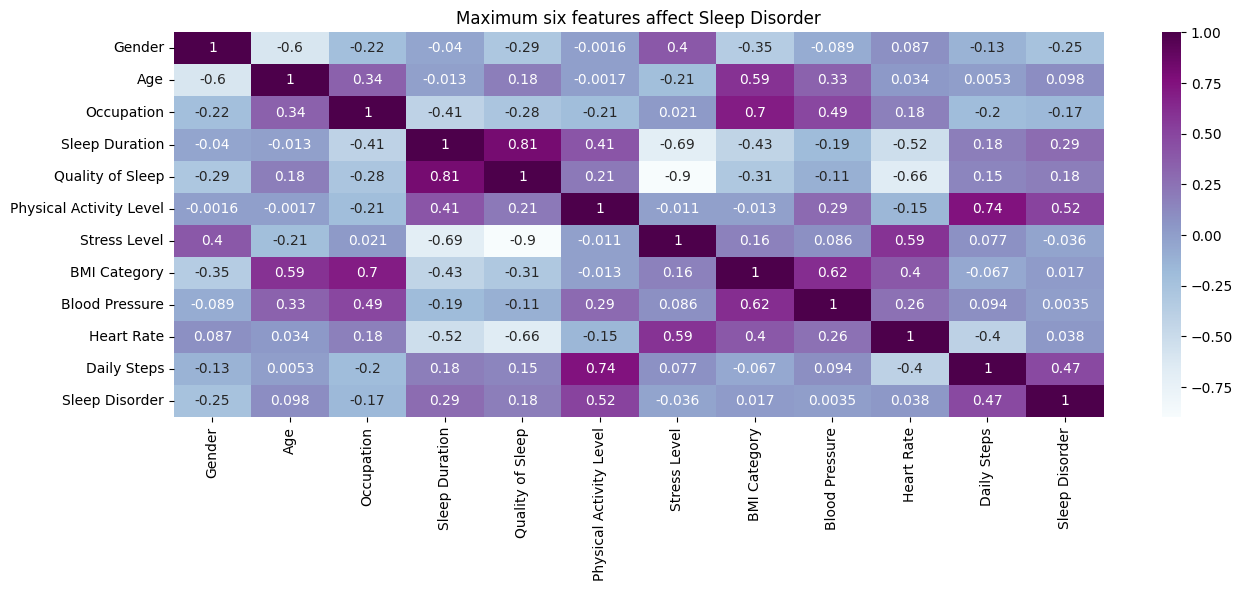

In [29]:
#plotting correlation matrix to understand the important features
fig, ax = plt.subplots(figsize=(15, 5))
correlation=sleep_data.corr()
#max_6_corr=correlation.nlargest(6,"Sleep Disorder")
sns.heatmap(correlation,cmap='BuPu',annot=True)
plt.title('Maximum six features affect Sleep Disorder')
plt.show()

**From the above, co-relation we can see that the important features related to or contributing to the sleep disorder are: Age, Sleep Duration, Quality of SLeep, BMI, BP, Physical Activity**

# 4. Model Training

**Splitting the data in training and testing**

In [30]:
from sklearn.model_selection import train_test_split
x=sleep_data.iloc[:,:-1]
y=sleep_data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=32,shuffle=True)

**We will use several models to train our data on. This will help us determine which model would be a better option**

**1. Logistic Regression**

In [31]:
# Logistic Regression

logreg = LogisticRegression(max_iter = 200)
logreg.fit(x_train, y_train)
logreg_y_pred = logreg.predict(x_test)
acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
print("Training Score: ", acc_log_train)
acc_log_test = round(logreg.score(x_test, y_test) * 100, 2)
print("Testing Score: ", acc_log_test)


Training Score:  90.8
Testing Score:  91.94


**2. Scalar Vector Machines**

In [32]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
svc_Y_pred = svc.predict(x_test)
acc_svc_train = round(svc.score(x_train, y_train) * 100, 2)
print("Training Score: ", acc_svc_train)
acc_svc_test = round(logreg.score(x_test, y_test) * 100, 2)
print("Testing Score: ", acc_svc_test)

Training Score:  88.8
Testing Score:  91.94


**3. KNN**

In [33]:
#knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
knn_Y_pred = knn.predict(x_test)
acc_knn_train = round(knn.score(x_train, y_train) * 100, 2)
print("Training Score: ", acc_knn_train)
acc_knn_test = round(logreg.score(x_test, y_test) * 100, 2)
print("Testing Score: ", acc_knn_test)

Training Score:  91.6
Testing Score:  91.94


**4. Decision Tree**

In [34]:
# Decision Tree

decision_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 9, random_state=2)
decision_tree.fit(x_train, y_train)
dt_Y_pred = decision_tree.predict(x_test)
acc_decision_tree_train = round(decision_tree.score(x_train, y_train) * 100, 2)
print("Training Score: ", acc_decision_tree_train)
acc_decision_tree_test = round(logreg.score(x_test, y_test) * 100, 2)
print("Testing Score: ", acc_decision_tree_test)

Training Score:  93.2
Testing Score:  91.94


**5. Random Forest**

In [35]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, max_depth=9)
random_forest.fit(x_train, y_train)
rf_Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
print("Training Score: ", acc_random_forest_train)
acc_random_forest_test = round(logreg.score(x_train, y_train) * 100, 2)
print("Testing Score: ", acc_random_forest_test)

Training Score:  93.2
Testing Score:  90.8


**Compare all the models to evaluate their performance**

In [36]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN',
              'Random Forest','Decision Tree'],
    'Train Score': [acc_log_train, acc_svc_train, acc_knn_train, 
              acc_decision_tree_train, acc_random_forest_train],
'Test Score': [acc_log_test, acc_svc_test, acc_knn_test, 
              acc_decision_tree_test, acc_random_forest_test]})
models.sort_values(by='Train Score', ascending=False)

,Model,Train Score,Test Score
3,Random Forest,93.2,91.94
4,Decision Tree,93.2,90.80
2,KNN,91.6,91.94
0,Logistic Regression,90.8,91.94
1,Support Vector Machines,88.8,91.94


# 5. Model Evaluation

In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a list of model names
model_names = ['Logistic Regression', 'SVM', 'k-Nearest Neighbors', 'Decision Tree', 'Random Forest']

# Create empty lists and dictionaries to store evaluation metric values and confusion matrices
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []
confusion_matrices = []

y_true = y_test
# Calculate and store metrics for each model
for model_name, y_pred in zip(model_names, [logreg_y_pred, svc_Y_pred, knn_Y_pred, dt_Y_pred, rf_Y_pred]):
    accuracy = round(accuracy_score(y_true, y_pred)* 100, 2)
    precision = round(precision_score(y_true, y_pred, average='weighted') * 100, 2)  # Using weighted precision
    recall = round(recall_score(y_true, y_pred, average='weighted') * 100, 2)  # Using weighted recall
    f1 = round(f1_score(y_true, y_pred, average='weighted') * 100, 2)  # Using weighted F1-score
    confusion = confusion_matrix(y_true, y_pred)
    
    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    confusion_matrices.append(confusion)

# Create a DataFrame to display the metrics and confusion matrices
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_values,
    'Precision': precision_values,
    'Recall': recall_values,
    'F1-Score': f1_values,
    'Confusion Matrix': confusion_matrices  # Adding confusion matrices to the DataFrame
})

# Display the DataFrame with metrics and confusion matrices
#print(metrics_df)
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,91.94,91.92,91.94,91.85,"[[12, 3, 0], [0, 72, 3], [1, 3, 30]]"
1,SVM,87.90,88.58,87.90,87.83,"[[12, 3, 0], [1, 72, 2], [5, 4, 25]]"
2,k-Nearest Neighbors,89.52,89.60,89.52,89.44,"[[11, 3, 1], [0, 73, 2], [5, 2, 27]]"
3,Decision Tree,90.32,90.16,90.32,90.21,"[[11, 3, 1], [0, 72, 3], [3, 2, 29]]"
4,Random Forest,91.13,90.96,91.13,90.99,"[[11, 3, 1], [0, 73, 2], [3, 2, 29]]"


**From the above results, we can see that logistic regression is a better choice. Several factors contribute towards that**

**Calculating mean absolute error (MAE), and mean squared error (MSE)**

In [38]:
# For logistic regression
mae = mean_absolute_error(y_test, logreg_y_pred)
mse = mean_squared_error(y_test, logreg_y_pred)
print("mean_absolute_error: ", mae)
print("mean_squared_error: ", mse)

mean_absolute_error:  0.08870967741935484
mean_squared_error:  0.10483870967741936


**Confusion Matrix (for classification):**

Visualize the confusion matrix to understand how the model's predictions compare to the true labels.

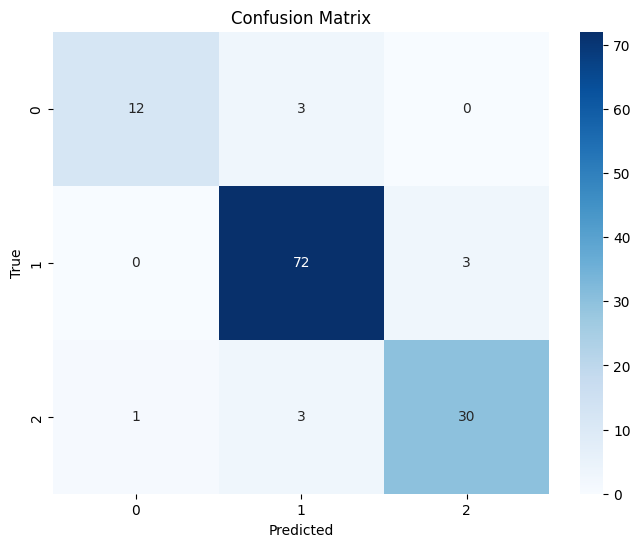

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, logreg_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**ROC Curve and Precision-Recall Curve (for classification with probability scores):**

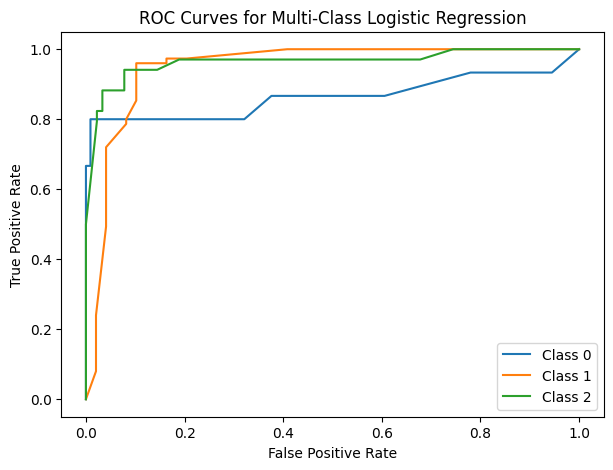

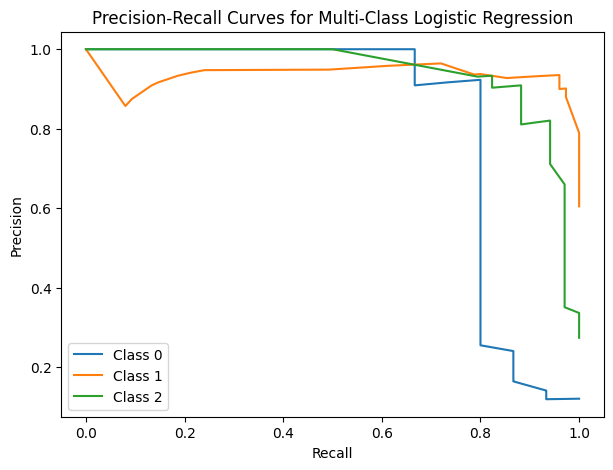

In [40]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have a multi-class problem and logreg is a trained Logistic Regression model
y_prob = logreg.predict_proba(x_test)
num_classes = 3
# Initialize dictionaries to store fpr, tpr, and precision-recall values for each class
fpr_dict = {}
tpr_dict = {}
precision_dict = {}
recall_dict = {}

# Calculate ROC curve and Precision-Recall curve for each class
for i in range(num_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_test == i, y_prob[:, i])
    precision_dict[i], recall_dict[i], _ = precision_recall_curve(y_test == i, y_prob[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(7, 5))
for i in range(num_classes):
    plt.plot(fpr_dict[i], tpr_dict[i], label=f'Class {i}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Logistic Regression')
plt.legend(loc='best')
plt.show()

# Plot Precision-Recall curves for each class
plt.figure(figsize=(7, 5))
for i in range(num_classes):
    plt.plot(recall_dict[i], precision_dict[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multi-Class Logistic Regression')
plt.legend(loc='best')
plt.show()


**Observations:**

**1. Plot ROC curves for each class**

* Model is performing very well in distinguishing that class from the others. 
* Specifically, it suggests that the true positive rate (TPR) is relatively high while keeping the false positive rate (FPR) low for that particular class.

**2. Plot Precision-Recall curves for each class**

* The sharp rise in the curve indicates that the model has a high precision for that particular class. 
* Precision measures the fraction of true positives among the predicted positives, and a high precision means that when the model predicts that class, it's very likely to be correct.


# 6. Model Interpretation

**Feature Importance:**

* Use the coefficients (weights) of Logistic Regression model to understand which features have the most significant impact on the predictions. 
* Positive coefficients indicate a positive relationship with the target variable, while negative coefficients indicate a negative relationship.

In [41]:
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': logreg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

feature_importance


,Feature,Coefficient
8,Blood Pressure,1.370524
0,Gender,0.799872
1,Age,0.499057
7,BMI Category,0.236157
6,Stress Level,0.160442
4,Quality of Sleep,0.022761
5,Physical Activity Level,-0.018036
2,Occupation,-0.031711
3,Sleep Duration,-0.795958
9,Heart Rate,-0.807436


**Odds Ratios:**

* Convert the coefficients into odds ratios to interpret the effect of each feature on the odds of the target variable. 
* This can help to understand how a one-unit change in a feature affects the odds of a positive outcome.

In [42]:
odds_ratios = np.exp(logreg.coef_[0])
feature_odds = pd.DataFrame({'Feature': x_train.columns, 'Odds Ratio': odds_ratios})
feature_odds = feature_odds.sort_values(by='Odds Ratio', ascending=False)
feature_odds

,Feature,Odds Ratio
8,Blood Pressure,3.937412
0,Gender,2.225256
1,Age,1.647167
7,BMI Category,1.266373
6,Stress Level,1.174030
4,Quality of Sleep,1.023022
5,Physical Activity Level,0.982125
2,Occupation,0.968786
3,Sleep Duration,0.451149
9,Heart Rate,0.446000


**SHAP**

* SHAP values indicate the importance of each feature in making a specific prediction.
* Positive SHAP values suggest that a feature contributes to increasing the model's output (prediction), while negative SHAP values suggest the opposite.

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


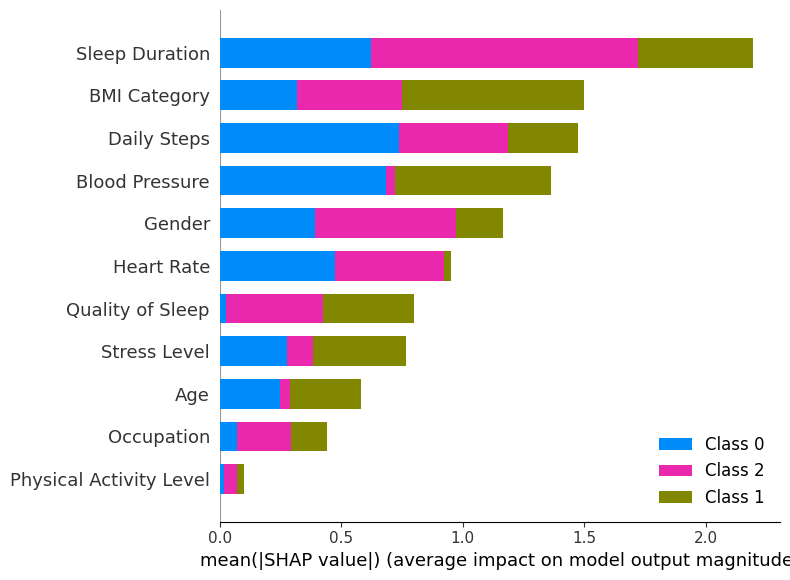

In [43]:
# Example using SHAP
import shap

explainer = shap.Explainer(logreg, x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)


# **7. Conclusions**

**As we see and interpret all the different evalutaion techniques, we see that there are 3 important parameters that directly contribute to the sleep disorder:**

**1) Blood Pressure**

**2) Gender**

**3) Blood Pressure**

**Other factors are related to these 3 and are also important factors contributing to the sleep patterns.**